<a href="https://colab.research.google.com/github/Denniskag/Computer-vision-exam/blob/main/cnn_models_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Computer vision datasets/data_A/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Computer vision datasets/data_A/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5638 images belonging to 2 classes.
Found 1408 images belonging to 2 classes.


In [ ]:
def build_resnet():
    resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = resnet.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    resnet_model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)
    resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return resnet_model


def build_mobilenet():
    mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = mobilenet.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    mobilenet_model = tf.keras.models.Model(inputs=mobilenet.input, outputs=predictions)
    mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return mobilenet_model


def build_googlenet():
    inception = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = inception.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    googlenet_model = tf.keras.models.Model(inputs=inception.input, outputs=predictions)
    googlenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return googlenet_model


def train_and_evaluate(model, model_name):
    print(f"Training {model_name}...")
    model.fit(x=training_set, validation_data=test_set, epochs=5)

    print(f"Evaluating {model_name}...")
    test_set.reset()
    predictions = model.predict(test_set)
    predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
    true_classes = test_set.classes

    cm = confusion_matrix(true_classes, predicted_classes)
    print(f"Confusion Matrix for {model_name}")
    print(cm)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['saloon_car', 'motorcycle'], yticklabels=['saloon_car', 'motorcycle'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    report = classification_report(true_classes, predicted_classes, target_names=['saloon_car', 'motorcycle'])
    print(f"Classification Report for {model_name}")
    print(report)

    fpr, tpr, thresholds = roc_curve(true_classes, predictions)
    roc_auc = auc(fpr, tpr)
    print(f"AUC for {model_name}: ", roc_auc)

    return fpr, tpr, roc_auc

In [ ]:
resnet = build_resnet()
mobilenet = build_mobilenet()
googlenet = build_googlenet()

Training ResNet...
Epoch 1/5
177/177 [==============================] - 154s 625ms/step - loss: 0.3206 - accuracy: 0.9299 - val_loss: 0.6127 - val_accuracy: 0.6925
Epoch 2/5
177/177 [==============================] - 108s 609ms/step - loss: 0.0864 - accuracy: 0.9720 - val_loss: 2.2734 - val_accuracy: 0.6925
Epoch 3/5
177/177 [==============================] - 111s 627ms/step - loss: 0.1401 - accuracy: 0.9592 - val_loss: 0.8034 - val_accuracy: 0.3168
Epoch 4/5
177/177 [==============================] - 107s 602ms/step - loss: 0.0610 - accuracy: 0.9782 - val_loss: 0.6549 - val_accuracy: 0.7053
Epoch 5/5
177/177 [==============================] - 109s 614ms/step - loss: 0.0462 - accuracy: 0.9844 - val_loss: 0.3300 - val_accuracy: 0.9389
Evaluating ResNet...
44/44 [==============================] - 6s 126ms/step
Confusion Matrix for ResNet
[[915  60]
 [ 26 407]]


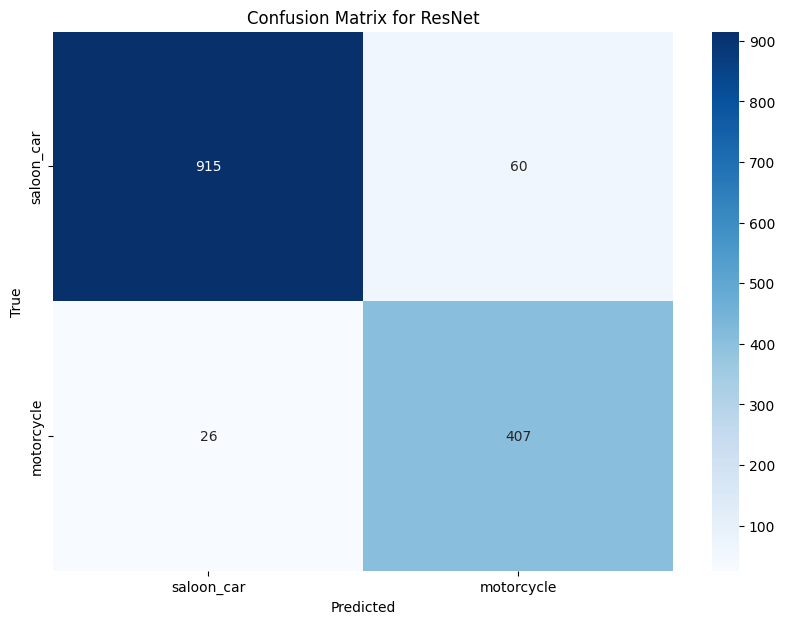

Classification Report for ResNet
              precision    recall  f1-score   support

  saloon_car       0.97      0.94      0.96       975
  motorcycle       0.87      0.94      0.90       433

    accuracy                           0.94      1408
   macro avg       0.92      0.94      0.93      1408
weighted avg       0.94      0.94      0.94      1408

AUC for ResNet:  0.9619115295789661


In [ ]:
fpr_resnet, tpr_resnet, roc_auc_resnet = train_and_evaluate(resnet, "ResNet")

In [ ]:
resnet.save('/content/drive/MyDrive/saved model/saved_model.h8')

Training MobileNet...
Epoch 1/5
177/177 [==============================] - 129s 572ms/step - loss: 0.1309 - accuracy: 0.9592 - val_loss: 7.8423 - val_accuracy: 0.4226
Epoch 2/5
177/177 [==============================] - 94s 532ms/step - loss: 0.0645 - accuracy: 0.9810 - val_loss: 1.9494 - val_accuracy: 0.7259
Epoch 3/5
177/177 [==============================] - 97s 550ms/step - loss: 0.0664 - accuracy: 0.9817 - val_loss: 2.5505 - val_accuracy: 0.4893
Epoch 4/5
177/177 [==============================] - 94s 532ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 4.5932 - val_accuracy: 0.3303
Epoch 5/5
177/177 [==============================] - 95s 537ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 19.9030 - val_accuracy: 0.3082
Evaluating MobileNet...
44/44 [==============================] - 7s 132ms/step
Confusion Matrix for MobileNet
[[  1 974]
 [  0 433]]


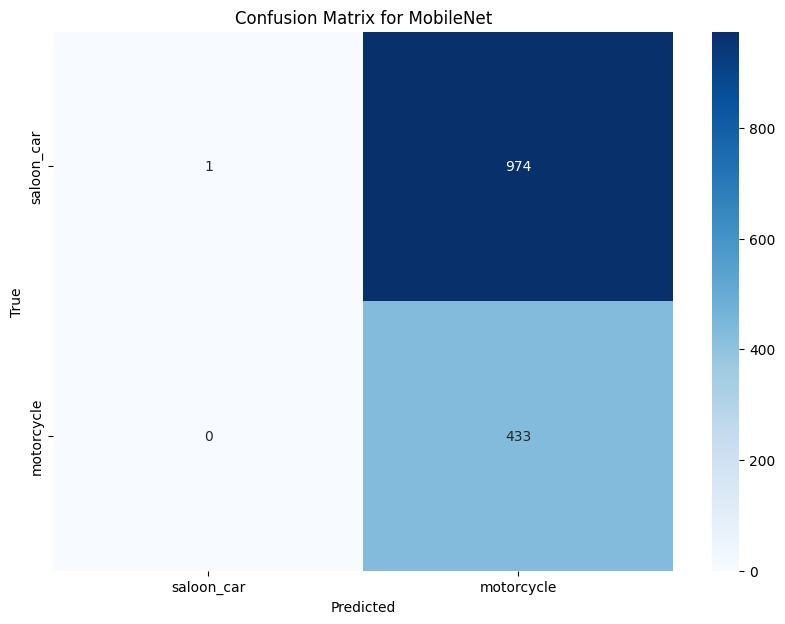

Classification Report for MobileNet
              precision    recall  f1-score   support

  saloon_car       1.00      0.00      0.00       975
  motorcycle       0.31      1.00      0.47       433

    accuracy                           0.31      1408
   macro avg       0.65      0.50      0.24      1408
weighted avg       0.79      0.31      0.15      1408

AUC for MobileNet:  0.5451282051282051


In [ ]:
fpr_mobilenet, tpr_mobilenet, roc_auc_mobilenet = train_and_evaluate(mobilenet, "MobileNet")

In [ ]:
mobilenet.save('/content/drive/MyDrive/saved model/saved_model.h9')

177/177 [==============================] - 134s 583ms/step - loss: 0.1807 - accuracy: 0.9390 - val_loss: 10257.9150 - val_accuracy: 0.6953
Epoch 2/5
177/177 [==============================] - 100s 566ms/step - loss: 0.1413 - accuracy: 0.9612 - val_loss: 0.1247 - val_accuracy: 0.9730
Epoch 3/5
177/177 [==============================] - 102s 575ms/step - loss: 0.1172 - accuracy: 0.9654 - val_loss: 0.6915 - val_accuracy: 0.7891
Epoch 4/5
177/177 [==============================] - 101s 570ms/step - loss: 0.0772 - accuracy: 0.9785 - val_loss: 0.0401 - val_accuracy: 0.9908
Epoch 5/5
177/177 [==============================] - 107s 602ms/step - loss: 0.0667 - accuracy: 0.9805 - val_loss: 0.4960 - val_accuracy: 0.8366
Evaluating GoogleNet...
44/44 [==============================] - 7s 140ms/step
Confusion Matrix for GoogleNet
[[755 220]
 [ 10 423]]


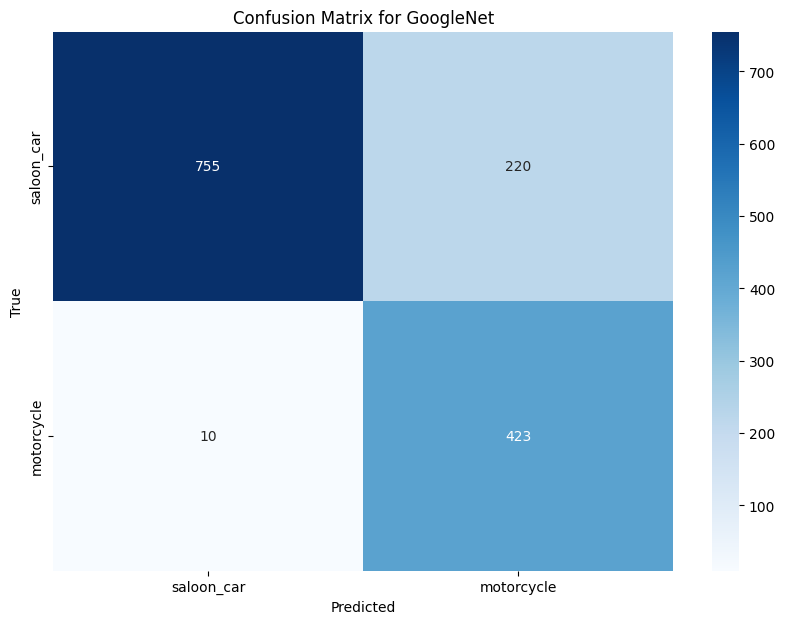

Classification Report for GoogleNet
              precision    recall  f1-score   support

  saloon_car       0.99      0.77      0.87       975
  motorcycle       0.66      0.98      0.79       433

    accuracy                           0.84      1408
   macro avg       0.82      0.88      0.83      1408
weighted avg       0.89      0.84      0.84      1408

AUC for GoogleNet:  0.9841452004500503


In [ ]:
fpr_googlenet, tpr_googlenet, roc_auc_googlenet = train_and_evaluate(googlenet, "GoogleNet")

In [ ]:
googlenet.save('/content/drive/MyDrive/saved model/saved_model.h10')

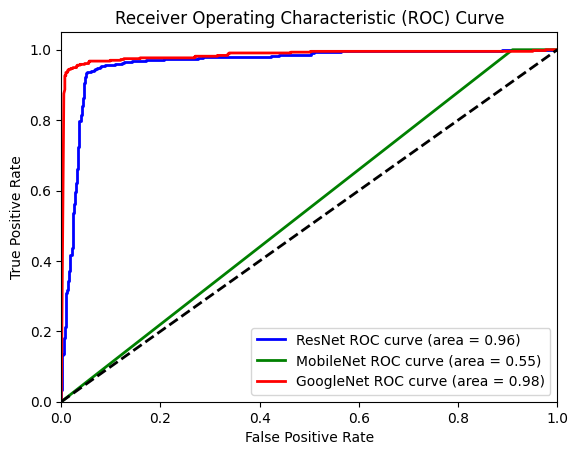

In [ ]:
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label='ResNet ROC curve (area = %0.2f)' % roc_auc_resnet)
plt.plot(fpr_mobilenet, tpr_mobilenet, color='green', lw=2, label='MobileNet ROC curve (area = %0.2f)' % roc_auc_mobilenet)
plt.plot(fpr_googlenet, tpr_googlenet, color='red', lw=2, label='GoogleNet ROC curve (area = %0.2f)' % roc_auc_googlenet)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()